# Group : 13

***Course : Financial Analytics***
***Subject : Portfolio Building, Optimization and Backtesting Results***



##Installing all required Packages

In [188]:
%%writefile requirements.txt
cvxpy>=1.2.2
matplotlib>=3.2.0
numpy>=1.12.0
pandas>=0.19
scikit-learn>=0.24.1
scipy>=1.3.0
yfinance>=0.1.55

Overwriting requirements.txt


In [189]:
# !pip install -r requirements.txt
!pip install yfinance
!pip install pendulum
!pip install matplotlib
!pip install pandas-datareader
!pip install pyfolio
!pip install cvxpy
!pip install -r requirements.txt
!pip install PyPortfolioOpt
!pip install openai
!pip install zipline

  Using cached zipline-1.4.1.tar.gz (5.4 MB)
  Preparing metadata (setup.py) ... done
  Using cached Logbook-1.7.0.post0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (490 kB)
  Using cached python-interface-1.6.1.tar.gz (19 kB)
  Preparing metadata (setup.py) ... done
  Using cached pandas-0.22.0.tar.gz (11.3 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [190]:
#Importing Libraries
import copy
import cvxpy
import datetime as dt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from matplotlib import mlab
%matplotlib inline
import numpy as np
import pandas as pd
import pendulum
import pyfolio as pf
from pypfopt import CLA
from pypfopt import objective_functions
from pypfopt import plotting
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientCVaR
from pypfopt.efficient_frontier import EfficientFrontier
import seaborn as sns
from scipy import stats
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize
import statistics
import time
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [191]:
cvxpy.installed_solvers()

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCIPY', 'SCS']

In [192]:
import yfinance as yf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics
from matplotlib import mlab


Basic libraries importing and used for analysis - line 1 - 6

Loading data and performing basic interpretations etc - line 7 - 15

Method 1: Equal Weighted Portfolio - line 15 to 20

Method 2: Minimum Variance Portfolio - line 22 to 27

Method 3: Global Minimum Variance Portfolio (GMVP) - line 28 to 30

Method 4: Minimum Variance Portfolio with Target Return - line 31 to 34

Method 5: Efficient Portfolio with Target Returns - line 35 to 37

Method 6: Tangency Portfolio - line 38 to 40

Method 7: Maximum Return Portfolio with Target Risk Level - line 41 to 43

Method 8: Efficient Frontier Portfolio - line 44 to 52

Method 9: ETL (Expected Tail Loss) Portfolio  - line 53 to 57

Method 10: Quadratic Utility Portfolio - line 58 - 60

Backtesting - line 61 to 69

Portfolio Selection Rationale Based on Sharpe Ratio - line 70 to 71

#### Loading 48 Stocks to Build Portfolio

In [193]:
tickers_list = ['HINDALCO.NS', 'RELIANCE.NS', 'ICICIBANK.NS', 'ULTRACEMCO.NS', 'MPHASIS.NS', 'BALRAMCHIN.NS', 'SJVN.NS',
                'COFORGE.NS','LUMAXTECH.NS', 'TRENT.NS', 'KIRLOSBROS.NS', 'CIPLA.NS', 'BATAINDIA.NS', 'GODREJCP.NS',
                'HBLPOWER.NS', 'POLYCAB.NS','EXIDEIND.NS', 'GULFOILLUB.NS', 'SCI.NS', 'JYOTHYLAB.NS', 'ERIS.NS',
                'LICHSGFIN.NS', 'TRITURBINE.NS', 'SPAL.NS','BAJAJHIND.NS', 'TEJASNET.NS', 'KSB.NS', 'BHEL.NS', 'FINCABLES.NS', 'ARVIND.NS', 'JSWSTEEL.NS',
                'TATAMOTORS.NS','BSE.NS', 'GABRIEL.NS', 'MAHSEAMLES.NS', 'ACE.NS', 'CASTROLIND.NS', 'CUMMINSIND.NS',
                'SCHNEIDER.NS', 'HCG.NS','ICRA.NS','SUVEN.NS','BEL.NS','VIPIND.NS','VRLLOG.NS','DCBBANK.NS','KOTAKBANK.NS','ITC.NS']


In [194]:
#Monthly data
monthly_data=yf.download(tickers=tickers_list,start="2007-07-01",end="2022-10-13",interval="1mo")['Adj Close']

[*********************100%%**********************]  48 of 48 completed


#### Dropping Missing values and redefining the dataset

In [195]:
monthly_data.dropna(how='any',inplace=True)

# Create a dictionary to map old column names to new ones
ticker_mapping = {ticker: ticker.split('.')[0] for ticker in tickers_list}

# Update column names using the rename function
monthly_data.rename(columns=ticker_mapping, inplace=True)

In [196]:
monthly_data

,ACE,ARVIND,BAJAJHIND,BALRAMCHIN,BATAINDIA,BEL,BHEL,BSE,CASTROLIND,CIPLA,...,SJVN,SPAL,SUVEN,TATAMOTORS,TEJASNET,TRENT,TRITURBINE,ULTRACEMCO,VIPIND,VRLLOG
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-01,104.110085,71.091545,8.950000,146.155243,1263.957642,33.279236,67.853554,578.804749,110.478485,544.068542,...,18.903080,287.106171,272.299988,172.063736,185.949615,388.838745,106.579140,4661.835449,429.896118,265.408722
2019-06-01,92.850983,60.363441,7.750000,132.061691,1379.916504,33.532593,70.704956,573.102661,101.342369,538.811462,...,18.530970,287.988190,271.200012,162.044952,141.621521,437.282440,101.774757,4461.802734,435.517303,256.940247
2019-07-01,75.645523,52.400810,6.000000,134.434341,1247.405518,30.611540,56.931259,481.572937,92.741081,507.317078,...,18.307705,247.512085,227.750000,135.178696,90.294266,394.342560,100.009865,4257.165039,374.173370,220.460464
2019-08-01,56.100517,47.771194,5.500000,126.082626,1478.063477,30.671139,48.860359,503.839417,93.926147,462.622864,...,18.307705,188.022919,259.700012,116.337410,78.650002,466.695129,97.264488,3978.768555,428.636780,268.945007
2019-09-01,72.672340,47.278198,6.500000,146.582306,1650.952148,32.851456,46.782223,534.633667,106.251450,416.649445,...,18.047232,195.814346,278.399994,117.085075,83.349998,481.265320,101.480598,4262.527832,470.930664,259.690948
2019-10-01,80.592155,49.595272,6.250000,154.649338,1732.148438,35.839329,55.966415,525.537537,118.825104,457.139343,...,18.700804,197.039413,282.850006,177.147888,74.550003,538.700928,98.833282,4068.069092,463.857086,250.071060
2019-11-01,76.417664,42.594749,6.500000,145.206192,1561.656128,31.274099,52.749954,478.683044,109.922020,456.992462,...,18.853464,197.725449,314.850006,160.998215,99.300003,517.765564,91.969872,4181.867188,421.907104,257.250824
2019-12-01,72.930733,39.390282,6.550000,177.073166,1679.088257,30.348925,43.001606,475.129883,100.979881,468.253265,...,19.425938,199.146530,307.100006,184.574738,95.050003,524.279968,92.674446,3972.680908,424.068451,261.994995
2020-01-01,84.864868,42.003151,6.350000,160.466522,1727.307251,27.497551,42.308830,505.402893,105.470474,437.604309,...,19.349606,202.184677,23.350000,176.051315,81.250000,587.583313,96.566673,4336.020996,455.408142,265.615967


In [197]:
# from google.colab import files
# monthly_data.to_csv('monthly_data.csv', index=False)
# files.download('monthly_data.csv')

In [198]:
#Setting the risk-free rate
risk_free_rate = 0.06  # Assuming a 6% risk-free rate

In [199]:
#Calculating expected returns
change = expected_returns.mean_historical_return(monthly_data) / 100
print("Expected Stock Monthly Returns (%):")
print(change)

Expected Stock Monthly Returns (%):
ACE             7.871984
ARVIND          0.037169
BAJAJHIND       0.013016
BALRAMCHIN      1.041014
BATAINDIA       0.082222
BEL            11.666172
BHEL            0.006694
BSE             0.000306
CASTROLIND      0.002770
CIPLA           1.028381
COFORGE         9.076868
CUMMINSIND      0.457248
DCBBANK        -0.009903
ERIS            0.092463
EXIDEIND       -0.007086
FINCABLES       0.022102
GABRIEL         0.021643
GODREJCP        0.023937
GULFOILLUB     -0.009870
HBLPOWER       80.883749
HCG             0.123649
HINDALCO        0.996161
ICICIBANK       1.156684
ICRA            0.095946
ITC             0.100328
JSWSTEEL        5.677750
JYOTHYLAB       0.044980
KIRLOSBROS      0.696059
KOTAKBANK       0.029717
KSB            13.195514
LICHSGFIN      -0.007693
LUMAXTECH       1.394248
MAHSEAMLES      0.377875
MPHASIS         1.436901
POLYCAB       127.807458
RELIANCE        0.625781
SCHNEIDER       0.308697
SCI            54.124027
SJVN          

In [200]:
#Calculating standard deviations (volatility)
Std_dav = monthly_data.std() / 100
print("Volatility (Standard Deviation (%)):")
print(Std_dav)

Volatility (Standard Deviation (%)):
ACE            0.808636
ARVIND         0.337963
BAJAJHIND      0.045294
BALRAMCHIN     1.161602
BATAINDIA      2.407024
BEL            0.236018
BHEL           0.138042
BSE            3.248349
CASTROLIND     0.103975
CIPLA          2.182913
COFORGE       14.073642
CUMMINSIND     2.729285
DCBBANK        0.469139
ERIS           1.267549
EXIDEIND       0.170118
FINCABLES      0.887189
GABRIEL        0.233245
GODREJCP       1.345050
GULFOILLUB     1.333780
HBLPOWER       0.276426
HCG            0.695747
HINDALCO       1.361816
ICICIBANK      1.703422
ICRA           5.585282
ITC            0.464914
JSWSTEEL       1.997883
JYOTHYLAB      0.223166
KIRLOSBROS     1.096223
KOTAKBANK      2.130190
KSB            4.384333
LICHSGFIN      0.702941
LUMAXTECH      0.553299
MAHSEAMLES     0.852873
MPHASIS        8.295647
POLYCAB        7.434966
RELIANCE       4.981741
SCHNEIDER      0.269683
SCI            0.359815
SJVN           0.042155
SPAL           1.188537
SUV

In [201]:
#Calculating Sharpe Ratio
def calculate_sharpe_ratios(expected_returns, risk_free_rates, standard_deviations):
    sharpe_ratios = (expected_returns - risk_free_rates) / standard_deviations
    return sharpe_ratios

sharpe_ratios = calculate_sharpe_ratios(change, risk_free_rate, Std_dav)
print(sharpe_ratios)

ACE             9.660696
ARVIND         -0.067556
BAJAJHIND      -1.037326
BALRAMCHIN      0.844535
BATAINDIA       0.009232
BEL            49.175000
BHEL           -0.386161
BSE            -0.018377
CASTROLIND     -0.550420
CIPLA           0.443618
COFORGE         0.640692
CUMMINSIND      0.145550
DCBBANK        -0.149002
ERIS            0.025611
EXIDEIND       -0.394349
FINCABLES      -0.042717
GABRIEL        -0.164450
GODREJCP       -0.026811
GULFOILLUB     -0.052385
HBLPOWER      292.388383
HCG             0.091482
HINDALCO        0.687436
ICICIBANK       0.643812
ICRA            0.006436
ITC             0.086743
JSWSTEEL        2.811851
JYOTHYLAB      -0.067305
KIRLOSBROS      0.580227
KOTAKBANK      -0.014216
KSB             2.996012
LICHSGFIN      -0.096299
LUMAXTECH       2.411443
MAHSEAMLES      0.372711
MPHASIS         0.165979
POLYCAB        17.181983
RELIANCE        0.113571
SCHNEIDER       0.922182
SCI           150.255174
SJVN            6.433756
SPAL           -0.024886


# Method 1: Equal Weighted Portfolio

In [202]:
#Selecting the top 25 stocks with the best Sharpe ratio
equal_weight_stocks = sharpe_ratios.nlargest(25).index
equal_weight_stocks

Index(['HBLPOWER', 'SCI', 'BEL', 'POLYCAB', 'TEJASNET', 'TRENT', 'ACE',
       'TRITURBINE', 'SJVN', 'KSB', 'JSWSTEEL', 'LUMAXTECH', 'TATAMOTORS',
       'SCHNEIDER', 'VRLLOG', 'BALRAMCHIN', 'HINDALCO', 'ICICIBANK', 'COFORGE',
       'KIRLOSBROS', 'CIPLA', 'MAHSEAMLES', 'MPHASIS', 'VIPIND', 'CUMMINSIND'],
      dtype='object')

In [203]:
numstocks = len(equal_weight_stocks)
equal_weightage=np.repeat(1/numstocks, numstocks)
equal_weightage

array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04])

In [204]:
#Extracting expected returns for selected stocks
ew_returns = change[equal_weight_stocks]
ew_returns

HBLPOWER       80.883749
SCI            54.124027
BEL            11.666172
POLYCAB       127.807458
TEJASNET       30.561472
TRENT          44.556145
ACE             7.871984
TRITURBINE      3.760471
SJVN            0.331213
KSB            13.195514
JSWSTEEL        5.677750
LUMAXTECH       1.394248
TATAMOTORS      2.114660
SCHNEIDER       0.308697
VRLLOG          1.529345
BALRAMCHIN      1.041014
HINDALCO        0.996161
ICICIBANK       1.156684
COFORGE         9.076868
KIRLOSBROS      0.696059
CIPLA           1.028381
MAHSEAMLES      0.377875
MPHASIS         1.436901
VIPIND          0.277263
CUMMINSIND      0.457248
dtype: float64

In [205]:
#Calculating portfolio return
ew_portfolio_return = np.dot(equal_weightage, ew_returns)
ew_portfolio_return

16.093094385948945

In [206]:
#Calculating portfolio return
ew_portfolio_return = np.dot(equal_weightage, ew_returns)

#Calculating the cumulative return
ew_cumulative_return = (1 + ew_portfolio_return).cumprod() - 1

#Printing portfolio statistics
print("Equal Weightage Portfolio Return:", np.mean(ew_portfolio_return))
print("Equal Weightage Portfolio Risk:", np.std(ew_portfolio_return))

Equal Weightage Portfolio Return: 16.093094385948945
Equal Weightage Portfolio Risk: 0.0


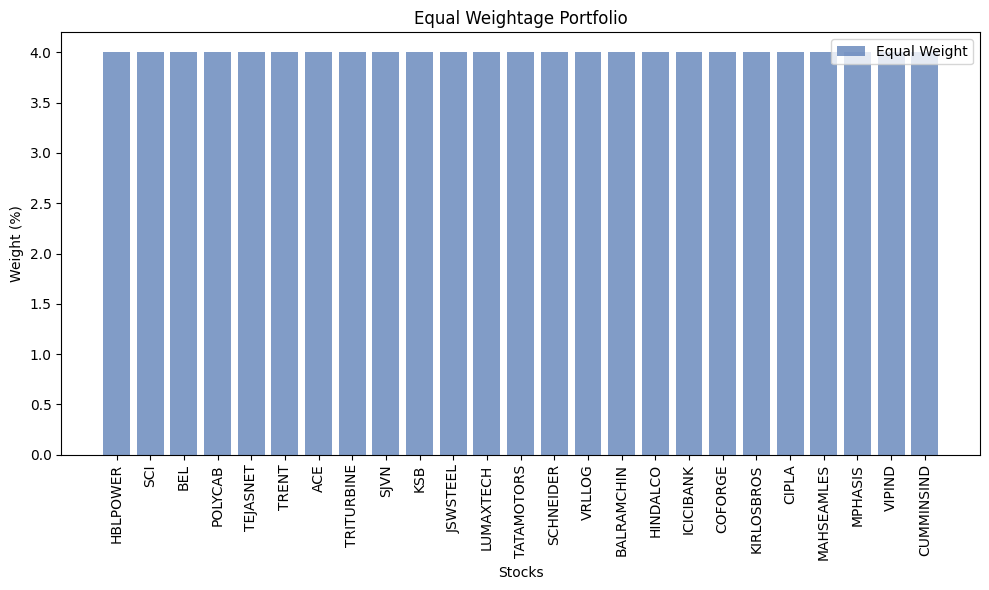

In [207]:
# Creating a bar plot for equal-weight portfolio returns
plt.figure(figsize=(10, 6))
bars = plt.bar(equal_weight_stocks, equal_weightage * 100, alpha=0.7, label='Equal Weight')

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

plt.xlabel('Stocks')
plt.ylabel('Weight (%)')
plt.title('Equal Weightage Portfolio')
plt.legend()

# Adjust layout for better readability
plt.tight_layout()

plt.show()

In [ ]:
import numpy as np

# Recreating the calculations based on the provided code snippet
# Since I don't have the monthly_data, I will use the data from the CSV file as a substitute
monthly_data = data / 100  # Dividing by 100 as per the provided code

# Calculating expected returns and standard deviation
change = monthly_data.pct_change().mean()  # Expected returns
Std_dav = monthly_data.pct_change().std()  # Standard deviation (Risk)

# Risk-free rate
risk_free_rate = 0.06

# Calculating Sharpe Ratios
sharpe_ratios = (change - risk_free_rate) / Std_dav

# Selecting the top 25 stocks based on Sharpe Ratio
top_stocks = sharpe_ratios.nlargest(25).index

# Equal weights for each stock in the portfolio
numstocks = len(top_stocks)
equal_weightage = np.repeat(1 / numstocks, numstocks)

# Extracting returns for the top stocks
ew_returns = change[top_stocks]

# Creating the final DataFrame
portfolio_df1 = pd.DataFrame({
    'Stock': top_stocks,
    'Weight': equal_weightage,
    'Return': ew_returns.values,
    'Risk': Std_dav[top_stocks].values
})

portfolio_df1

**#####################################################################################################################**

In [208]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Method 2: Minimum Variance Portfolio

In [209]:
data = monthly_data[equal_weight_stocks]
# data = monthly_data

In [210]:
data

,HBLPOWER,SCI,BEL,POLYCAB,TEJASNET,TRENT,ACE,TRITURBINE,SJVN,KSB,...,BALRAMCHIN,HINDALCO,ICICIBANK,COFORGE,KIRLOSBROS,CIPLA,MAHSEAMLES,MPHASIS,VIPIND,CUMMINSIND
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-01,24.095266,31.992237,33.279236,592.995850,185.949615,388.838745,104.110085,106.579140,18.903080,637.869080,...,146.155243,190.324249,415.499359,1232.604248,174.497849,544.068542,213.476242,857.727783,429.896118,710.947937
2019-06-01,21.523836,30.622534,33.532593,603.868530,141.621521,437.282440,92.850983,101.774757,18.530970,672.035522,...,132.061691,200.033676,428.639984,1268.826782,174.071426,538.811462,202.545715,866.573853,435.517303,687.551147
2019-07-01,18.619070,28.078812,30.611540,546.806702,90.294266,394.342560,75.645523,100.009865,18.307705,573.566650,...,134.434341,184.092819,416.381927,1135.303467,170.423218,507.317078,196.559982,810.304016,374.173370,638.013000
2019-08-01,14.333350,27.393961,30.671139,599.838379,78.650002,466.695129,56.100517,97.264488,18.307705,574.175842,...,126.082626,178.199524,402.702759,1410.745850,139.958344,462.622864,177.348770,866.944641,428.636780,524.677856
2019-09-01,17.666687,42.313885,32.851456,668.823425,83.349998,481.265320,72.672340,101.480598,18.047232,650.007751,...,146.582306,186.132996,426.344940,1315.802856,153.174301,416.649445,179.028580,850.241882,470.930664,530.378418
2019-10-01,16.471256,56.500046,35.839329,834.748657,74.550003,538.700928,80.592155,98.833282,18.700804,652.585510,...,154.649338,182.777039,455.197144,1460.881714,147.168396,457.139343,175.479446,844.244934,463.857086,503.665070
2019-11-01,14.969464,59.190521,31.274099,901.831055,99.300003,517.765564,76.417664,91.969872,18.853464,632.198120,...,145.206192,194.693069,503.906830,1406.406250,130.544098,456.992462,178.965942,780.365723,421.907104,502.091003
2019-12-01,15.357023,60.658058,30.348925,968.181580,95.050003,524.279968,72.930733,92.674446,19.425938,632.526001,...,177.073166,210.256821,529.760864,1509.381592,142.267609,468.253265,181.851334,819.368469,424.068451,510.054077
2020-01-01,18.409050,58.652431,27.497551,960.668335,81.250000,587.583313,84.864868,96.566673,19.349606,693.875916,...,160.466522,184.187531,516.735596,1844.135254,141.450775,437.604309,186.227509,826.120667,455.408142,531.998840


In [211]:
# Calculating monthly returns
monthly_returns = data.pct_change().dropna()

# Display the first few rows of monthly returns
monthly_returns.head()

,HBLPOWER,SCI,BEL,POLYCAB,TEJASNET,TRENT,ACE,TRITURBINE,SJVN,KSB,...,BALRAMCHIN,HINDALCO,ICICIBANK,COFORGE,KIRLOSBROS,CIPLA,MAHSEAMLES,MPHASIS,VIPIND,CUMMINSIND
Date,,,,,,,,,,,,,,,,,,,,,
2019-06-01,-0.106719,-0.042814,0.007613,0.018335,-0.238388,0.124586,-0.108146,-0.045078,-0.019685,0.053563,...,-0.096429,0.051015,0.031626,0.029387,-0.002444,-0.009663,-0.051203,0.010313,0.013076,-0.032909
2019-07-01,-0.134956,-0.083067,-0.087111,-0.094494,-0.362426,-0.098197,-0.185302,-0.017341,-0.012048,-0.146523,...,0.017966,-0.079691,-0.028598,-0.105234,-0.020958,-0.058452,-0.029553,-0.064934,-0.140853,-0.072050
2019-08-01,-0.230179,-0.024390,0.001947,0.096984,-0.128959,0.183476,-0.258376,-0.027451,0.000000,0.001062,...,-0.062125,-0.032013,-0.032852,0.242616,-0.178760,-0.088099,-0.097737,0.069900,0.145557,-0.177638
2019-09-01,0.232558,0.544643,0.071087,0.115006,0.059758,0.031220,0.295395,0.043347,-0.014228,0.132071,...,0.162589,0.044520,0.058709,-0.067300,0.094428,-0.099376,0.009472,-0.019266,0.098671,0.010865
2019-10-01,-0.067666,0.335260,0.090951,0.248085,-0.105579,0.119343,0.108980,-0.026087,0.036215,0.003966,...,0.055034,-0.018030,0.067673,0.110259,-0.039210,0.097180,-0.019824,-0.007053,-0.015020,-0.050367


In [212]:
import numpy as np
from scipy.optimize import minimize

# Calculate average returns and the covariance matrix
average_returns = monthly_returns.mean()
covariance_matrix = monthly_returns.cov()

# Set up the optimization problem

# Number of assets
num_assets = len(average_returns)

# Initial guess (equal distribution)
initial_guess = np.repeat(1/num_assets, num_assets)

# Constraints
constraints = ({
    'type': 'eq',
    'fun': lambda x: np.sum(x) - 1  # The sum of weights is 1
})

# Bounds for each weight
bounds = tuple((0, 1) for asset in range(num_assets))

# Objective function (minimize variance)
def portfolio_variance(weights):
    return np.dot(weights.T, np.dot(covariance_matrix, weights))

# Minimize the variance
result = minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimal weights
optimal_weights = result.x

optimal_weights


array([5.23243251e-18, 2.02528348e-18, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.09199300e-01, 1.56863032e-19, 0.00000000e+00,
       5.93039926e-01, 2.69096180e-18, 0.00000000e+00, 1.07266761e-17,
       6.12994476e-18, 0.00000000e+00, 2.79171796e-06, 0.00000000e+00,
       0.00000000e+00, 3.49310825e-19, 0.00000000e+00, 0.00000000e+00,
       2.26940902e-01, 0.00000000e+00, 6.95198578e-02, 1.29722213e-03,
       7.05582614e-19])

In [213]:
# Annualized return, risk and Sharpe Ratio

# Risk-free rate assumption
risk_free_rate = 0.06

# Annualized Portfolio Return
annualized_return = np.sum(optimal_weights * average_returns) * 12  # Assuming 12 months in a year

# Annualized Portfolio Variance
annualized_variance = np.dot(optimal_weights.T, np.dot(covariance_matrix * 12, optimal_weights))  # Annualize the variance

# Annualized Portfolio Standard Deviation (Risk)
annualized_std_dev = np.sqrt(annualized_variance)

# Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev

annualized_return, annualized_std_dev, sharpe_ratio


(0.24427750635368442, 0.14885086532196534, 1.2380009075196912)

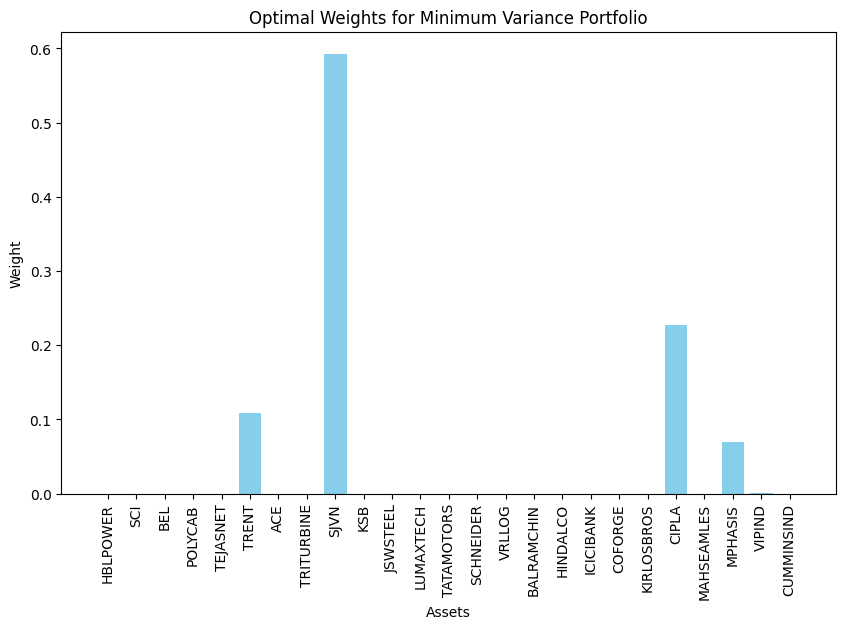

In [214]:
import matplotlib.pyplot as plt

# Plotting the optimal weights
plt.figure(figsize=(10, 6))
plt.bar(monthly_returns.columns, optimal_weights, color='skyblue')
plt.title('Optimal Weights for Minimum Variance Portfolio')
plt.xlabel('Assets')
plt.ylabel('Weight')
plt.xticks(rotation=90, ha='center')  # Set rotation to 90 degrees and ha to 'center' for better alignment
plt.show()


In [264]:
# Creating a DataFrame with stock, optimal weight, return, and risk
optimized_portfolio2 = pd.DataFrame({
    'Stock': top_stocks,
    'Optimal Weight': optimal_weights,
    'Return': average_returns[top_stocks].values,
    'Risk': monthly_returns[top_stocks].std().values
})

optimized_portfolio2


,Stock,Optimal Weight,Return,Risk
0,TEJASNET,5.232433e-18,0.055315,0.216932
1,HBLPOWER,2.025283e-18,0.052417,0.196310
2,SCI,0.000000e+00,0.046847,0.168783
3,ACE,0.000000e+00,0.044476,0.187506
4,TATAMOTORS,0.000000e+00,0.039155,0.194629
5,LUMAXTECH,1.091993e-01,0.034344,0.171321
6,TRENT,1.568630e-19,0.040958,0.119802
7,KIRLOSBROS,0.000000e+00,0.031148,0.179708
8,COFORGE,5.930399e-01,0.036467,0.137511
9,JSWSTEEL,2.690962e-18,0.035214,0.142372


# Method 3: Global Minimum Variance Portfolio (GMVP)

In [215]:
# The optimization setup remains the same as the minimum variance portfolio
# The objective function is still to minimize the portfolio variance

# Minimize the variance for GMVP
gmvp_result = minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimal weights for GMVP
gmvp_optimal_weights = gmvp_result.x

gmvp_optimal_weights


array([5.23243251e-18, 2.02528348e-18, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.09199300e-01, 1.56863032e-19, 0.00000000e+00,
       5.93039926e-01, 2.69096180e-18, 0.00000000e+00, 1.07266761e-17,
       6.12994476e-18, 0.00000000e+00, 2.79171796e-06, 0.00000000e+00,
       0.00000000e+00, 3.49310825e-19, 0.00000000e+00, 0.00000000e+00,
       2.26940902e-01, 0.00000000e+00, 6.95198578e-02, 1.29722213e-03,
       7.05582614e-19])

In [216]:
# Annualized Portfolio Return for GMVP
gmvp_annualized_return = np.sum(gmvp_optimal_weights * average_returns) * 12  # Assuming 12 months in a year

# Annualized Portfolio Variance for GMVP
gmvp_annualized_variance = np.dot(gmvp_optimal_weights.T, np.dot(covariance_matrix * 12, gmvp_optimal_weights))  # Annualize the variance

# Annualized Portfolio Standard Deviation (Risk) for GMVP
gmvp_annualized_std_dev = np.sqrt(gmvp_annualized_variance)

# Sharpe Ratio for GMVP
gmvp_sharpe_ratio = (gmvp_annualized_return - risk_free_rate) / gmvp_annualized_std_dev

gmvp_annualized_return, gmvp_annualized_std_dev, gmvp_sharpe_ratio


(0.24427750635368442, 0.14885086532196534, 1.2380009075196912)

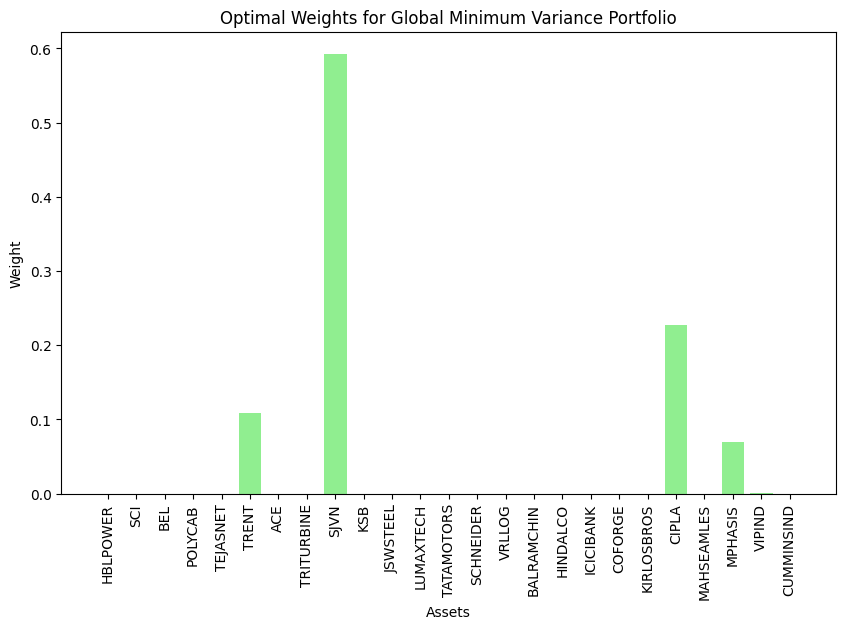

In [217]:
# Plotting the optimal weights for GMVP
plt.figure(figsize=(10, 6))
plt.bar(monthly_returns.columns, gmvp_optimal_weights, color='lightgreen')
plt.title('Optimal Weights for Global Minimum Variance Portfolio')
plt.xlabel('Assets')
plt.ylabel('Weight')
plt.xticks(rotation=90, ha='center')  # Set rotation to 90 degrees and ha to 'center' for better alignment
plt.show()


In [265]:
# Creating a DataFrame for the GMVP with stock, optimal weight, return, and risk
gmvp_portfolio_df = pd.DataFrame({
    'Stock': top_stocks,
    'Optimal Weight': gmvp_optimal_weights,
    'Return': average_returns[top_stocks].values,
    'Risk': monthly_returns[top_stocks].std().values
})

gmvp_portfolio_df

,Stock,Optimal Weight,Return,Risk
0,TEJASNET,5.232433e-18,0.055315,0.216932
1,HBLPOWER,2.025283e-18,0.052417,0.196310
2,SCI,0.000000e+00,0.046847,0.168783
3,ACE,0.000000e+00,0.044476,0.187506
4,TATAMOTORS,0.000000e+00,0.039155,0.194629
5,LUMAXTECH,1.091993e-01,0.034344,0.171321
6,TRENT,1.568630e-19,0.040958,0.119802
7,KIRLOSBROS,0.000000e+00,0.031148,0.179708
8,COFORGE,5.930399e-01,0.036467,0.137511
9,JSWSTEEL,2.690962e-18,0.035214,0.142372


# Method 4: Minimum Variance Portfolio with Target Return

In [218]:
# We select a target return based on the average returns of the assets

# we can select a target retun but here i am going with average returns

In [219]:
# Calculating the target return as the mean of the average returns
target_return = average_returns.mean()

# The optimization problem needs an additional constraint for the target return
def target_return_constraint(weights):
    return np.sum(weights * average_returns) - target_return

# Adding the target return constraint
target_return_constraints = (constraints, {
    'type': 'eq',
    'fun': target_return_constraint
})

# Minimize the variance with the target return constraint
target_return_result = minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds, constraints=target_return_constraints)

# Extract the optimal weights for the minimum variance portfolio with target return
target_return_optimal_weights = target_return_result.x

target_return, target_return_optimal_weights


(0.03305001748899506,
 array([5.44713676e-02, 0.00000000e+00, 1.32057527e-01, 2.39698801e-01,
        0.00000000e+00, 1.58570385e-01, 4.09286320e-18, 0.00000000e+00,
        8.48967974e-02, 5.04606764e-03, 5.20417043e-18, 2.71050543e-20,
        8.32125167e-18, 0.00000000e+00, 2.49366500e-18, 1.57209315e-18,
        6.23416249e-18, 0.00000000e+00, 1.97734050e-02, 3.44234190e-18,
        2.72997766e-01, 6.50521303e-19, 3.24878823e-02, 0.00000000e+00,
        0.00000000e+00]))

In [220]:
# Annualized Portfolio Return for the Minimum Variance Portfolio with Target Return
mv_target_annualized_return = np.sum(target_return_optimal_weights * average_returns) * 12  # Assuming 12 months in a year

# Annualized Portfolio Variance for the Minimum Variance Portfolio with Target Return
mv_target_annualized_variance = np.dot(target_return_optimal_weights.T, np.dot(covariance_matrix * 12, target_return_optimal_weights))  # Annualize the variance

# Annualized Portfolio Standard Deviation (Risk) for the Minimum Variance Portfolio with Target Return
mv_target_annualized_std_dev = np.sqrt(mv_target_annualized_variance)

# Sharpe Ratio for the Minimum Variance Portfolio with Target Return
mv_target_sharpe_ratio = (mv_target_annualized_return - risk_free_rate) / mv_target_annualized_std_dev

mv_target_annualized_return, mv_target_annualized_std_dev, mv_target_sharpe_ratio


(0.3966002098881763, 0.1961362190870746, 1.7161552897006889)

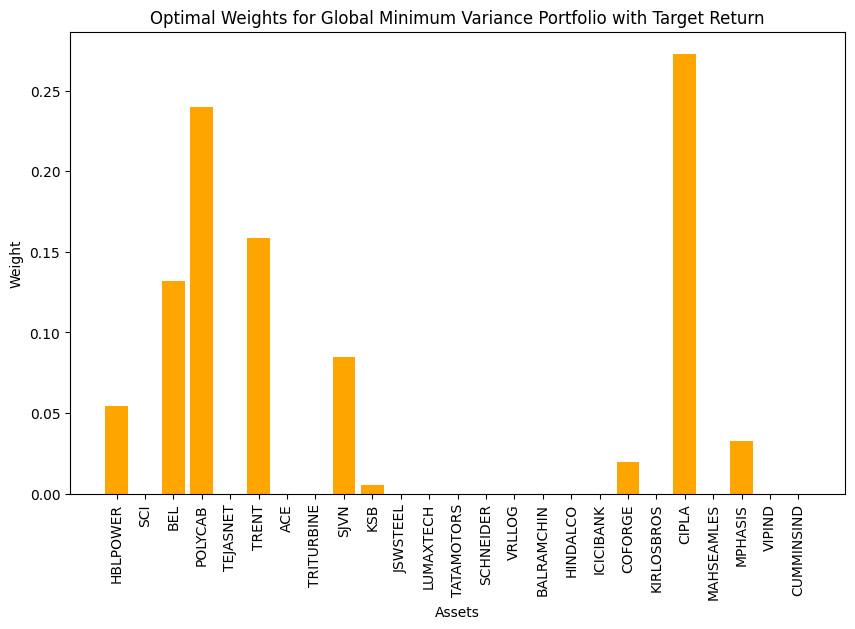

In [221]:
# Plotting the optimal weights for Minimum Variance Portfolio with Target Return
plt.figure(figsize=(10, 6))
plt.bar(monthly_returns.columns, target_return_optimal_weights, color='orange')
plt.title('Optimal Weights for Global Minimum Variance Portfolio with Target Return')
plt.xlabel('Assets')
plt.ylabel('Weight')
plt.xticks(rotation=90, ha='center')  # Set rotation to 90 degrees and ha to 'center' for better alignment
plt.show()

In [266]:
# Creating a DataFrame for the Minimum Variance Portfolio with Target Return
mv_target_portfolio_df = pd.DataFrame({
    'Stock': top_stocks,
    'Optimal Weight': target_return_optimal_weights,
    'Return': average_returns[top_stocks].values,
    'Risk': monthly_returns[top_stocks].std().values
})
mv_target_portfolio_df

,Stock,Optimal Weight,Return,Risk
0,TEJASNET,5.447137e-02,0.055315,0.216932
1,HBLPOWER,0.000000e+00,0.052417,0.196310
2,SCI,1.320575e-01,0.046847,0.168783
3,ACE,2.396988e-01,0.044476,0.187506
4,TATAMOTORS,0.000000e+00,0.039155,0.194629
5,LUMAXTECH,1.585704e-01,0.034344,0.171321
6,TRENT,4.092863e-18,0.040958,0.119802
7,KIRLOSBROS,0.000000e+00,0.031148,0.179708
8,COFORGE,8.489680e-02,0.036467,0.137511
9,JSWSTEEL,5.046068e-03,0.035214,0.142372


# Method 5: Efficient Portfolio with Target Returns of 16%, 18%, 20%, 23%, and 25%

In [222]:
# Target returns
target_returns = [0.16, 0.18, 0.20, 0.23, 0.25]

# Function to calculate optimal weights for given target return
def calculate_optimal_weights_for_target_return(t_return):
    # Constraint for the specific target return
    specific_target_return_constraint = ({
        'type': 'eq',
        'fun': lambda x: np.sum(x * average_returns) - t_return
    })

    # Combine constraints
    all_constraints = (constraints, specific_target_return_constraint)

    # Minimize the variance for the specific target return
    result = minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds, constraints=all_constraints)

    return result.x

# Dictionary to store results
efficient_portfolios = {}

# Calculate optimal weights for each target return
for t_return in target_returns:
    eff_optimal_weights = calculate_optimal_weights_for_target_return(t_return)
    efficient_portfolios[t_return] = eff_optimal_weights

efficient_portfolios


{0.16: array([1.54187181e-12, 8.39226308e-13, 6.41223142e-14, 5.26294849e-13,
        1.00000000e+00, 1.08280448e-12, 8.55820766e-19, 9.25601950e-20,
        4.57803079e-18, 1.70735799e-18, 6.77172116e-13, 0.00000000e+00,
        4.96768254e-13, 8.08328010e-19, 7.76933919e-17, 2.74750514e-16,
        2.49828471e-18, 2.33319949e-13, 5.92080798e-13, 3.01629812e-17,
        9.43753662e-13, 9.05777228e-13, 1.13500262e-13, 4.50792904e-17,
        4.62911197e-17]),
 0.18: array([3.15358683e-13, 6.61321941e-13, 1.34660556e-13, 1.01895094e-13,
        1.00000000e+00, 3.12295012e-13, 1.43192123e-15, 6.76281188e-20,
        1.03980934e-16, 9.39117005e-20, 2.55369845e-18, 3.42303011e-20,
        3.40277153e-21, 8.24826193e-20, 5.38894574e-13, 3.82321405e-13,
        1.10678308e-13, 1.66820339e-14, 4.68127668e-13, 2.66578176e-15,
        7.10877989e-19, 3.69241376e-19, 6.84619711e-13, 1.24036278e-12,
        2.72478967e-19]),
 0.2: array([1.92095722e-13, 5.05632261e-17, 1.17249821e-12, 5.14529079e

In [223]:
# Function to calculate annualized return, risk and Sharpe Ratio for given weights
def calculate_portfolio_metrics(weights):
    annualized_return = np.sum(weights * average_returns) * 12
    annualized_variance = np.dot(weights.T, np.dot(covariance_matrix * 12, weights))
    annualized_std_dev = np.sqrt(annualized_variance)
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev
    return annualized_return, annualized_std_dev, sharpe_ratio

# Dictionary to store metrics for each target return
efficient_portfolio_metrics = {}

# Calculate metrics for each target return
for t_return, weights in efficient_portfolios.items():
    metrics = calculate_portfolio_metrics(weights)
    efficient_portfolio_metrics[t_return] = metrics

efficient_portfolio_metrics

{0.16: (0.6637788964017222, 0.7514742083175145, 0.8034592401428262),
 0.18: (0.6637788963999733, 0.7514742083170484, 0.8034592401409975),
 0.2: (0.6637788963996781, 0.7514742083162915, 0.8034592401414139),
 0.23: (0.6637788964093408, 0.7514742083210535, 0.8034592401491809),
 0.25: (0.6637788964001998, 0.7514742083170358, 0.8034592401413122)}

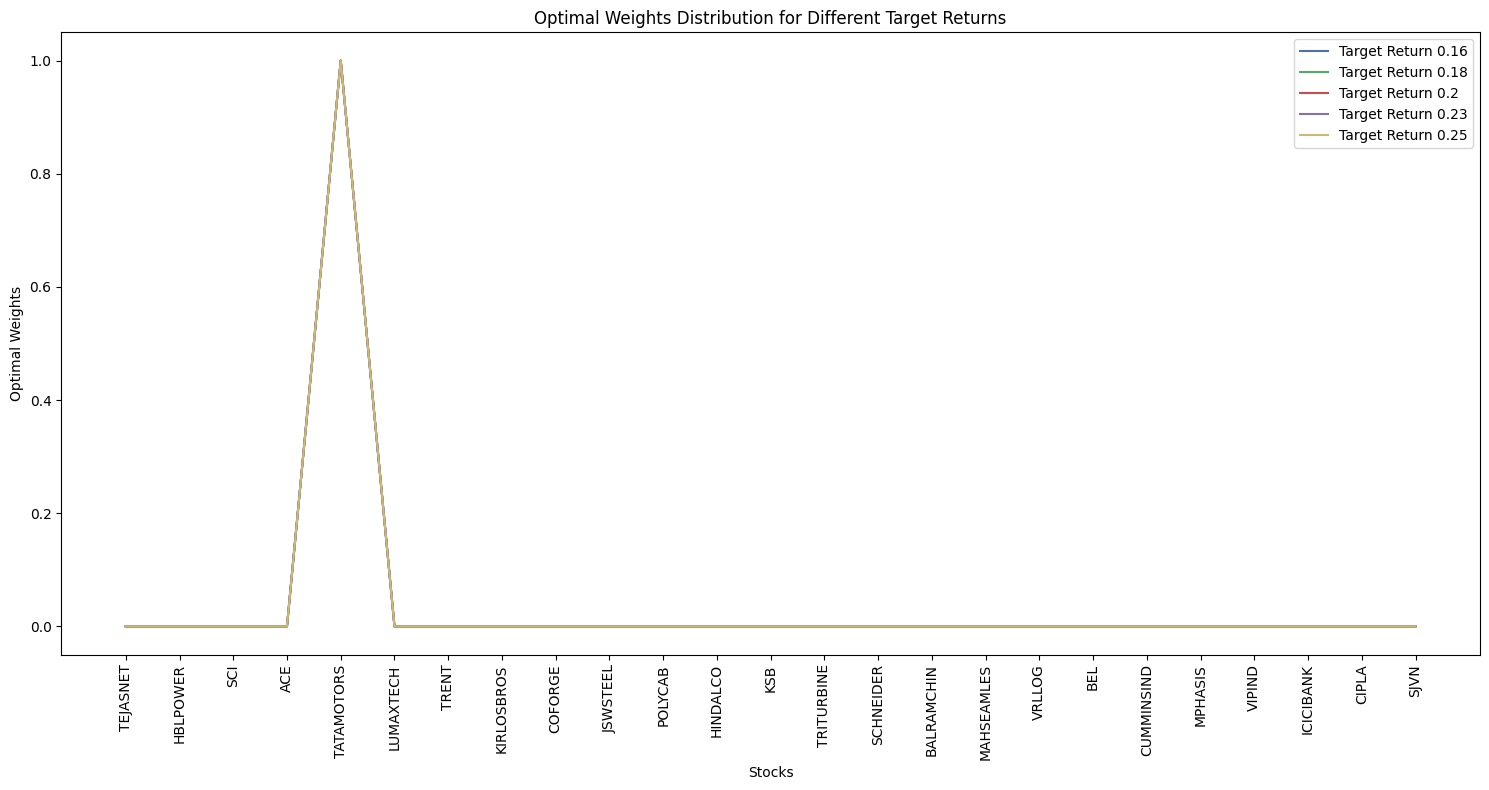

In [267]:
# Creating individual DataFrames for each target return and concatenating them
all_target_return_dfs = []

for t_return, weights in efficient_portfolios.items():
    # Create a DataFrame for each target return
    target_return_df = pd.DataFrame({
        'Stock': top_stocks,
        'Optimal Weight': weights,
        'Return': average_returns[top_stocks].values,
        'Risk': monthly_returns[top_stocks].std().values,
        'Target Return': t_return
    })
    all_target_return_dfs.append(target_return_df)

# Concatenate all DataFrames
complete_target_return_df = pd.concat(all_target_return_dfs)

# Display the first few rows of the concatenated DataFrame
complete_target_return_df


,Stock,Optimal Weight,Return,Risk,Target Return
0,TEJASNET,1.541872e-12,0.055315,0.216932,0.16
1,HBLPOWER,8.392263e-13,0.052417,0.196310,0.16
2,SCI,6.412231e-14,0.046847,0.168783,0.16
3,ACE,5.262948e-13,0.044476,0.187506,0.16
4,TATAMOTORS,1.000000e+00,0.039155,0.194629,0.16
...,...,...,...,...,...
20,MPHASIS,2.549716e-16,0.025782,0.111437,0.25
21,VIPIND,1.468216e-13,0.021226,0.121767,0.25
22,ICICIBANK,2.031836e-15,0.024280,0.099462,0.25
23,CIPLA,2.185157e-16,0.021925,0.087014,0.25


In [224]:
# These results indicate that despite different target returns, the portfolios end up having similar annualized returns, risks, and Sharpe Ratios. This outcome could be due to the constraints of the optimization problem and the nature of the dataset

# Method 6: Tangency Portfolio -  the portfolio that maximizes the Sharpe Ratio

In [225]:
# Objective function to maximize Sharpe Ratio (which is equivalent to minimizing its negative)
def negative_sharpe_ratio(weights):
    portfolio_return = np.sum(weights * average_returns)
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_std_dev = np.sqrt(portfolio_variance)
    return -(portfolio_return / portfolio_std_dev)

# Minimize the negative Sharpe Ratio
tangency_result = minimize(negative_sharpe_ratio, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimal weights for the Tangency Portfolio
tangency_optimal_weights = tangency_result.x

tangency_optimal_weights


array([0.04430475, 0.        , 0.12624106, 0.23535849, 0.        ,
       0.16015388, 0.        , 0.        , 0.09707902, 0.00645927,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01724918, 0.        ,
       0.27672982, 0.        , 0.03642453, 0.        , 0.        ])

In [226]:
# Calculating metrics for the Tangency Portfolio
tangency_metrics = calculate_portfolio_metrics(tangency_optimal_weights)
tangency_metrics

(0.39038219722348355, 0.19294448502016337, 1.712317391134333)

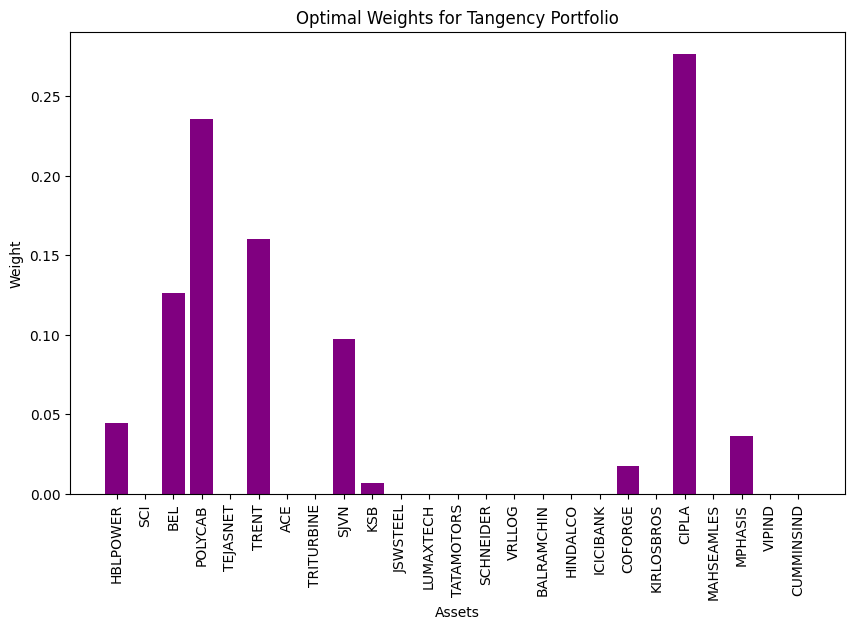

In [227]:
# Plotting the optimal weights for the Tangency Portfolio
plt.figure(figsize=(10, 6))
plt.bar(monthly_returns.columns, tangency_optimal_weights, color='purple')
plt.title('Optimal Weights for Tangency Portfolio')
plt.xlabel('Assets')
plt.ylabel('Weight')
plt.xticks(rotation=90, ha='center')  # Set rotation to 90 degrees and ha to 'center' for better alignment
plt.show()

In [270]:
# Creating a DataFrame for the Tangency Portfolio
tangency_portfolio_df = pd.DataFrame({
    'Stock': top_stocks,
    'Optimal Weight': tangency_optimal_weights,
    'Return': average_returns[top_stocks].values,
    'Risk': monthly_returns[top_stocks].std().values
})

tangency_portfolio_df


,Stock,Optimal Weight,Return,Risk
0,TEJASNET,0.044305,0.055315,0.216932
1,HBLPOWER,0.000000,0.052417,0.196310
2,SCI,0.126241,0.046847,0.168783
3,ACE,0.235358,0.044476,0.187506
4,TATAMOTORS,0.000000,0.039155,0.194629
5,LUMAXTECH,0.160154,0.034344,0.171321
6,TRENT,0.000000,0.040958,0.119802
7,KIRLOSBROS,0.000000,0.031148,0.179708
8,COFORGE,0.097079,0.036467,0.137511
9,JSWSTEEL,0.006459,0.035214,0.142372


# Method 7: Maximum Return Portfolio with Target Risk Level (5%, 7%, 9%, 11%, 12% and 15%)

In [228]:
# Target risk levels
target_risks = [0.05, 0.07, 0.09, 0.11, 0.12, 0.15]

# Function to maximize return for a given risk level
def maximize_return_for_target_risk(target_risk):
    # Constraint for the specific target risk
    def target_risk_constraint(weights):
        portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
        portfolio_std_dev = np.sqrt(portfolio_variance)
        return portfolio_std_dev - target_risk

    # Combine constraints
    all_constraints = (constraints, {
        'type': 'eq',
        'fun': target_risk_constraint
    })

    # Objective function to maximize return (minimize negative return)
    def negative_portfolio_return(weights):
        return -np.sum(weights * average_returns)

    # Minimize the negative return for the specific target risk
    result = minimize(negative_portfolio_return, initial_guess, method='SLSQP', bounds=bounds, constraints=all_constraints)

    return result.x

# Dictionary to store results for each target risk
maximum_return_portfolios = {}

# Calculate optimal weights for each target risk
for risk in target_risks:
    max_risk_optimal_weights = maximize_return_for_target_risk(risk)
    maximum_return_portfolios[risk] = max_risk_optimal_weights

maximum_return_portfolios

{0.05: array([2.78049346e-02, 0.00000000e+00, 9.61594654e-02, 1.71869826e-01,
        0.00000000e+00, 1.49580089e-01, 1.67915811e-17, 1.90413007e-17,
        2.42198766e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.60039115e-17,
        1.02931444e-17, 6.47471985e-18, 0.00000000e+00, 0.00000000e+00,
        2.56587935e-01, 0.00000000e+00, 5.57989837e-02, 0.00000000e+00,
        0.00000000e+00]),
 0.07: array([9.94614655e-02, 4.34222970e-17, 9.36144365e-02, 3.74158053e-01,
        2.41704696e-02, 1.74253020e-01, 2.17924637e-17, 1.30104261e-18,
        0.00000000e+00, 1.17868935e-03, 9.21571847e-18, 0.00000000e+00,
        1.57209315e-18, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.58027500e-02, 0.00000000e+00,
        1.67361116e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.52654407e-18]),
 0.09: array([1.49940190e-01, 1.32749036e-02, 0.00000000e+00, 4.96670625

In [229]:
# Dictionary to store metrics for each target risk
maximum_return_portfolio_metrics = {}

# Calculate metrics for each target risk
for risk, weights in maximum_return_portfolios.items():
    metrics = calculate_portfolio_metrics(weights)
    maximum_return_portfolio_metrics[risk] = metrics

maximum_return_portfolio_metrics


{0.05: (0.34716047711645165, 0.1732052841595087, 1.6579198406672109),
 0.07: (0.46788851717849195, 0.24249038640949722, 1.6820811877040123),
 0.09: (0.5373576170267921, 0.31177152252924584, 1.531113596117533),
 0.11: (0.5766865984299412, 0.38105118878904615, 1.3559506271898396),
 0.12: (0.590287617390741, 0.41569285177648435, 1.2756717252282066),
 0.15: (0.6239053948808557, 0.5196153847531144, 1.0852361408598108)}

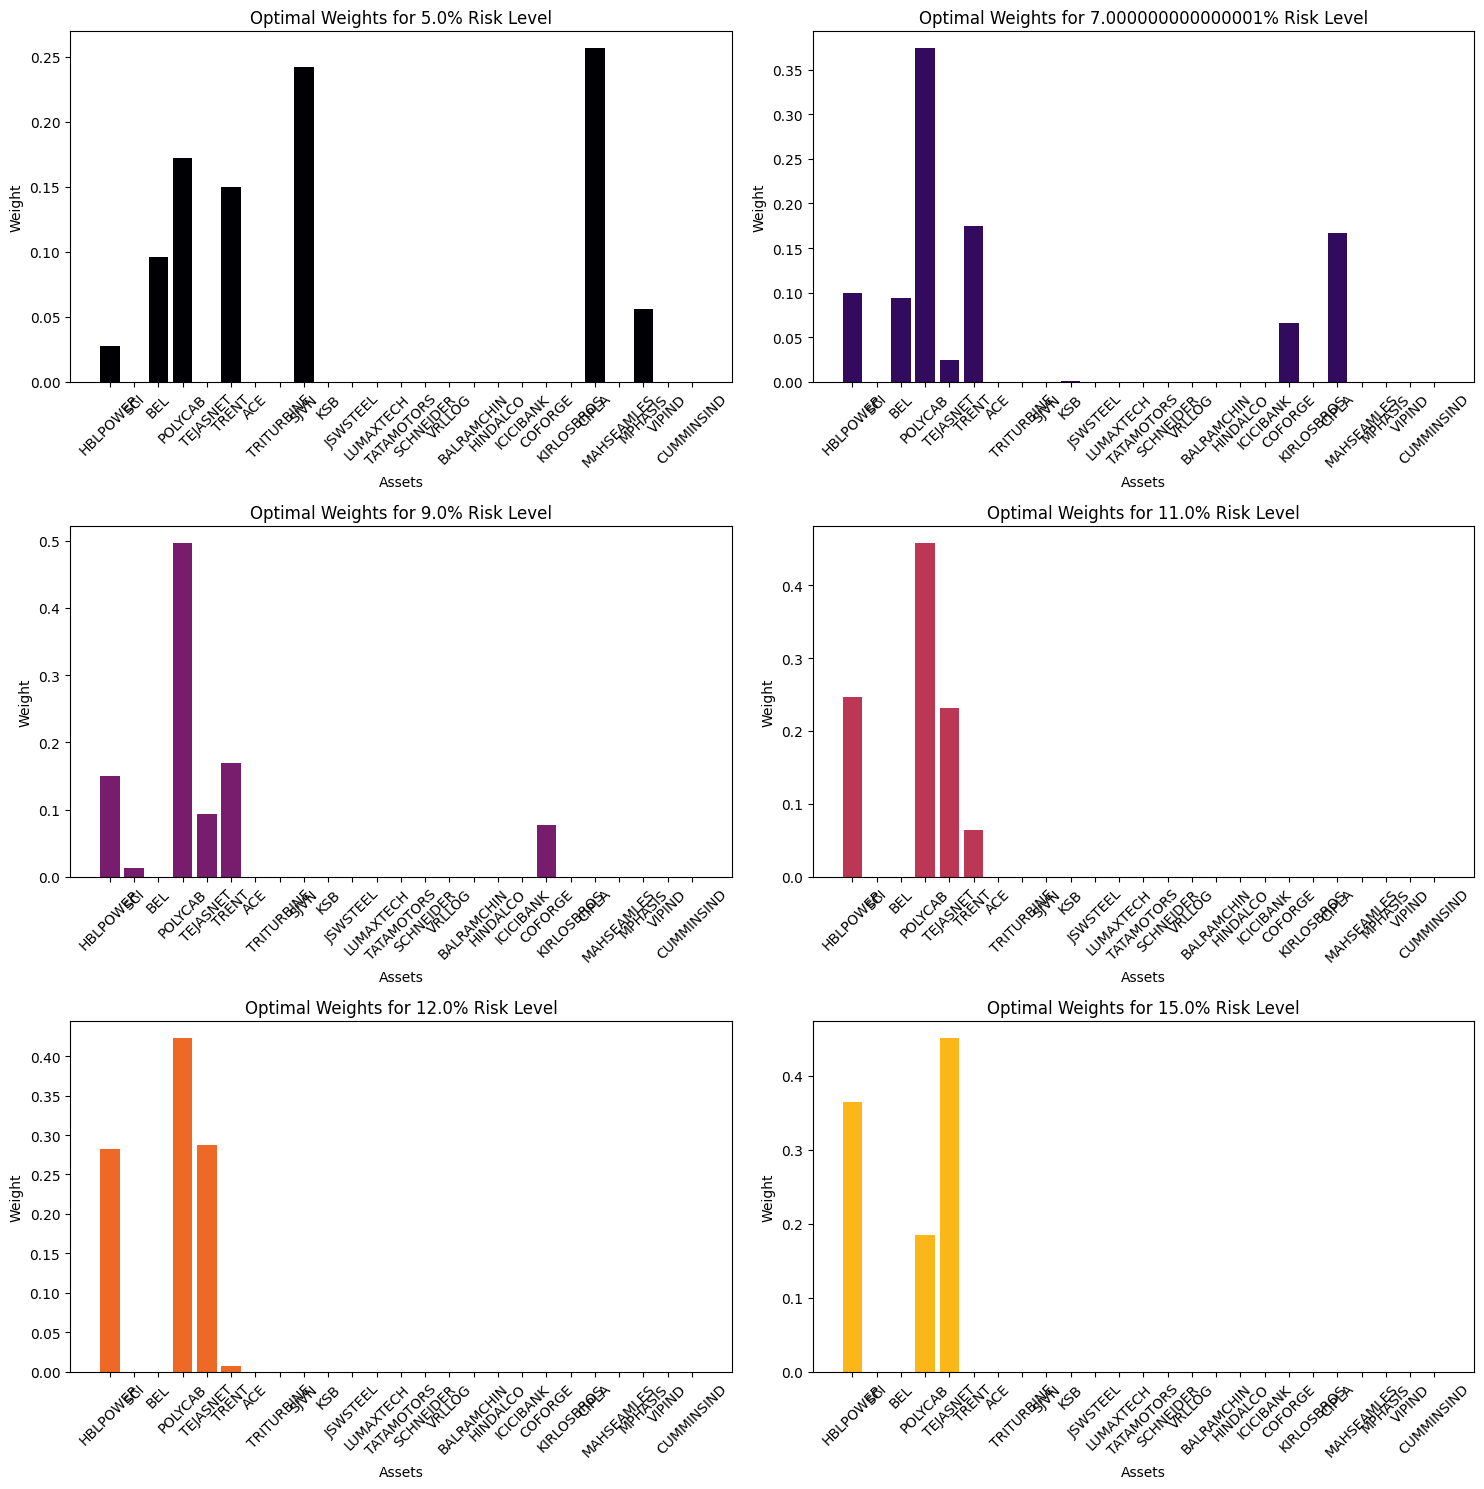

In [230]:
# Plotting the optimal weights for each target risk portfolio

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each portfolio
for i, (risk, weights) in enumerate(maximum_return_portfolios.items()):
    axes[i].bar(monthly_returns.columns, weights, color=plt.cm.inferno(i / len(maximum_return_portfolios)))
    axes[i].set_title(f'Optimal Weights for {risk*100}% Risk Level')
    axes[i].set_xlabel('Assets')
    axes[i].set_ylabel('Weight')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [272]:
# Recreating the DataFrame for each target risk and concatenating them
all_target_risk_dfs = []

for risk, weights in maximum_return_portfolios.items():
    # Create a DataFrame for each target risk
    target_risk_df = pd.DataFrame({
        'Stock': top_stocks,
        'Optimal Weight': weights,
        'Return': average_returns[top_stocks].values,
        'Risk': monthly_returns[top_stocks].std().values,
        'Target Risk': risk
    })
    all_target_risk_dfs.append(target_risk_df)

# Concatenate all DataFrames
complete_target_risk_df = pd.concat(all_target_risk_dfs)

# Sorting the DataFrame by the 'Return' column in descending order
sorted_target_risk_df = complete_target_risk_df.sort_values(by='Return', ascending=False)

# Display the first few rows of the sorted DataFrame
sorted_target_risk_df


,Stock,Optimal Weight,Return,Risk,Target Risk
0,TEJASNET,2.780493e-02,0.055315,0.216932,0.05
0,TEJASNET,9.946147e-02,0.055315,0.216932,0.07
0,TEJASNET,3.642167e-01,0.055315,0.216932,0.15
0,TEJASNET,2.824628e-01,0.055315,0.216932,0.12
0,TEJASNET,1.499402e-01,0.055315,0.216932,0.09
...,...,...,...,...,...
24,SJVN,2.456396e-17,0.015325,0.050749,0.11
24,SJVN,0.000000e+00,0.015325,0.050749,0.05
24,SJVN,0.000000e+00,0.015325,0.050749,0.12
24,SJVN,4.526544e-18,0.015325,0.050749,0.07


from matplotlib import pyplot as plt
sorted_target_risk_df['Optimal Weight'].plot(kind='hist', bins=20, title='Optimal Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sorted_target_risk_df['Return'].plot(kind='hist', bins=20, title='Return')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sorted_target_risk_df['Risk'].plot(kind='hist', bins=20, title='Risk')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sorted_target_risk_df['Target Risk'].plot(kind='hist', bins=20, title='Target Risk')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sorted_target_risk_df.plot(kind='scatter', x='Optimal Weight', y='Return', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sorted_target_risk_df.plot(kind='scatter', x='Return', y='Risk', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sorted_target_risk_df.plot(kind='scatter', x='Risk', y='Target Risk', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sorted_target_risk_df['Optimal Weight'].plot(kind='line', figsize=(8, 4), title='Optimal Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sorted_target_risk_df['Return'].plot(kind='line', figsize=(8, 4), title='Return')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sorted_target_risk_df['Risk'].plot(kind='line', figsize=(8, 4), title='Risk')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sorted_target_risk_df['Target Risk'].plot(kind='line', figsize=(8, 4), title='Target Risk')
plt.gca().spines[['top', 'right']].set_visible(False)

# Method 8: Efficient Frontier Portfolio

In [231]:
# Efficient Frontier along with the point representing the Maximum Sharpe Ratio (Tangency Portfolio)
# here for computaion purpose i am taking the num_portfolios = 10000, as we have to simulate random portfolios to get to efficin=ent frontier

In [232]:
# Number of portfolios to simulate
num_portfolios = 10000

In [233]:
# Arrays to store returns, volatility, and Sharpe Ratio for the random portfolios
portfolio_returns = []
portfolio_volatility = []
portfolio_sharpe_ratios = []
portfolio_weights = []

In [234]:
# Risk-free rate for Sharpe Ratio calculation
risk_free_rate = 0.06

In [235]:
# Simulate random portfolio weights
for _ in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_weights.append(weights)

    # Portfolio Return
    returns = np.dot(weights, average_returns) * 12  # Annualized
    portfolio_returns.append(returns)

    # Portfolio Volatility
    volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix * 12, weights)))  # Annualized
    portfolio_volatility.append(volatility)

    # Sharpe Ratio
    sharpe = (returns - risk_free_rate) / volatility
    portfolio_sharpe_ratios.append(sharpe)

In [236]:
# Convert to NumPy arrays
portfolio_returns = np.array(portfolio_returns)
portfolio_volatility = np.array(portfolio_volatility)
portfolio_sharpe_ratios = np.array(portfolio_sharpe_ratios)

In [237]:
# Tangency Portfolio (Maximum Sharpe Ratio) from earlier calculation
tangency_return = tangency_metrics[0]
tangency_volatility = tangency_metrics[1]
tangency_sharpe = tangency_metrics[2]

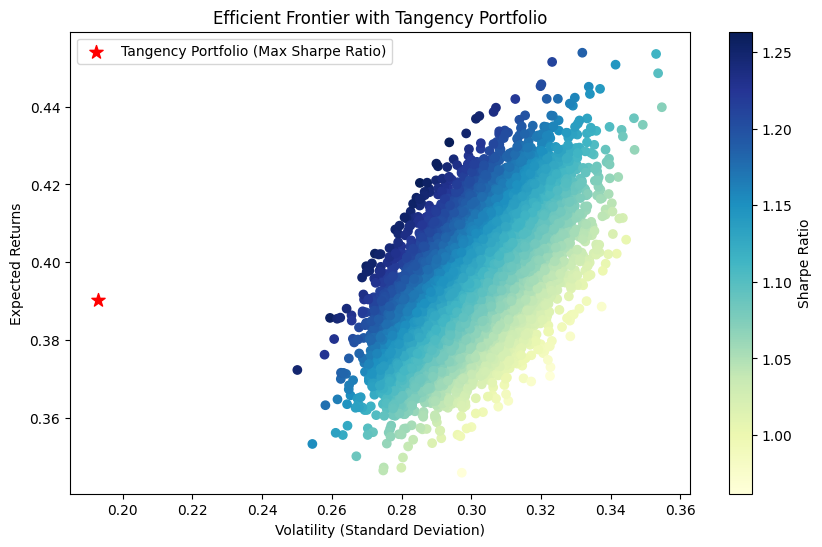

In [238]:
# Plotting the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatility, portfolio_returns, c=portfolio_sharpe_ratios, cmap='YlGnBu', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')

# Mark the Tangency Portfolio
plt.scatter(tangency_volatility, tangency_return, color='red', marker='*', s=100, label='Tangency Portfolio (Max Sharpe Ratio)')
plt.legend()

plt.title('Efficient Frontier with Tangency Portfolio')
plt.show()

In [239]:
# Creating a DataFrame for the weights of the Tangency Portfolio
tangency_weights_df = pd.DataFrame(tangency_optimal_weights, index=monthly_returns.columns, columns=['Weight'])

# Sorting the weights from highest to lowest
sorted_tangency_weights = tangency_weights_df.sort_values(by='Weight', ascending=False)

sorted_tangency_weights

,Weight
CIPLA,0.276730
POLYCAB,0.235358
TRENT,0.160154
BEL,0.126241
SJVN,0.097079
HBLPOWER,0.044305
MPHASIS,0.036425
COFORGE,0.017249
KSB,0.006459
BALRAMCHIN,0.000000


In [273]:
# Creating a DataFrame for the simulated random portfolios
random_portfolios_df = pd.DataFrame({
    'Return': portfolio_returns,
    'Volatility': portfolio_volatility,
    'Sharpe Ratio': portfolio_sharpe_ratios
})

# Display the first few rows of the DataFrame
random_portfolios_df


,Return,Volatility,Sharpe Ratio
0,0.413652,0.301537,1.172831
1,0.379309,0.284989,1.120426
2,0.368013,0.296150,1.040056
3,0.386655,0.316327,1.032650
4,0.374804,0.306930,1.025654
...,...,...,...
9995,0.397484,0.294902,1.144396
9996,0.400766,0.290128,1.174536
9997,0.424710,0.318103,1.146515
9998,0.388702,0.305786,1.074939


from matplotlib import pyplot as plt
random_portfolios_df['Return'].plot(kind='hist', bins=20, title='Return')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
random_portfolios_df['Volatility'].plot(kind='hist', bins=20, title='Volatility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
random_portfolios_df['Sharpe Ratio'].plot(kind='hist', bins=20, title='Sharpe Ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
random_portfolios_df.plot(kind='scatter', x='Return', y='Volatility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
random_portfolios_df.plot(kind='scatter', x='Volatility', y='Sharpe Ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
random_portfolios_df['Return'].plot(kind='line', figsize=(8, 4), title='Return')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
random_portfolios_df['Volatility'].plot(kind='line', figsize=(8, 4), title='Volatility')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
random_portfolios_df['Sharpe Ratio'].plot(kind='line', figsize=(8, 4), title='Sharpe Ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

# Method 9: ETL (Expected Tail Loss) Portfolio

In [240]:
from scipy.stats import norm

# Function to calculate the ETL (Expected Tail Loss) at a given confidence level
def calculate_etl(returns, weights, confidence_level=0.95):
    # Portfolio Return
    portfolio_return = np.dot(weights, returns.mean())

    # Portfolio Volatility
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))

    # Calculating the ETL
    etl = portfolio_return - portfolio_volatility * norm.ppf(confidence_level)
    return etl

In [241]:
# Confidence level for ETL calculation
confidence_level = 0.95 # Note here that we can adjust confidence level as per our convinience, hence we aiming to minimize the ETL at a 95%

# Simulate a range of portfolios to find the one with minimum ETL
etl_values = []
etl_weights = []

for _ in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    etl = calculate_etl(monthly_returns, weights, confidence_level)
    etl_values.append(etl)
    etl_weights.append(weights)


In [242]:
# Find the portfolio with minimum ETL
min_etl = min(etl_values)
min_etl_index = etl_values.index(min_etl)
optimal_etl_weights = etl_weights[min_etl_index]

min_etl, optimal_etl_weights

(-0.13405145187916084,
 array([0.0384544 , 0.10577801, 0.03091451, 0.03556637, 0.09995104,
        0.05755124, 0.1127344 , 0.01469687, 0.00385262, 0.00699871,
        0.02074229, 0.12008481, 0.00241326, 0.06584457, 0.04036783,
        0.02537029, 0.00119354, 0.03230013, 0.00405399, 0.04140851,
        0.00799081, 0.07755233, 0.00320818, 0.0088379 , 0.0421334 ]))

In [243]:
# Calculating metrics for the ETL Portfolio
etl_portfolio_metrics = calculate_portfolio_metrics(optimal_etl_weights)

etl_portfolio_metrics

(0.44576999697210123, 0.3605491425638625, 1.0699512255913117)

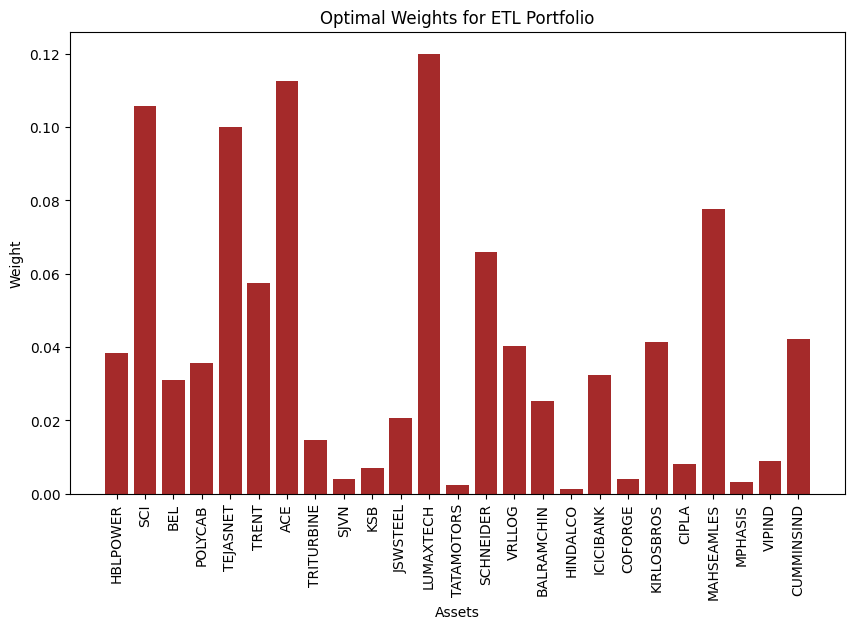

In [244]:
# Plotting the optimal weights for the ETL Portfolio
plt.figure(figsize=(10, 6))
plt.bar(monthly_returns.columns, optimal_etl_weights, color='brown')
plt.title('Optimal Weights for ETL Portfolio')
plt.xlabel('Assets')
plt.ylabel('Weight')
plt.xticks(rotation=90, ha='center')  # Set rotation to 90 degrees and ha to 'center' for better alignment
plt.show()


In [274]:
optimal_etl_portfolio_df = pd.DataFrame({
    'Stock': top_stocks,
    'Optimal Weight': optimal_etl_weights,
    'Return': average_returns[top_stocks].values,
    'Risk': monthly_returns[top_stocks].std().values
})

# Display the first few rows of the DataFrame
optimal_etl_portfolio_df

,Stock,Optimal Weight,Return,Risk
0,TEJASNET,0.038454,0.055315,0.216932
1,HBLPOWER,0.105778,0.052417,0.196310
2,SCI,0.030915,0.046847,0.168783
3,ACE,0.035566,0.044476,0.187506
4,TATAMOTORS,0.099951,0.039155,0.194629
5,LUMAXTECH,0.057551,0.034344,0.171321
6,TRENT,0.112734,0.040958,0.119802
7,KIRLOSBROS,0.014697,0.031148,0.179708
8,COFORGE,0.003853,0.036467,0.137511
9,JSWSTEEL,0.006999,0.035214,0.142372


# Method 10: Quadratic Utility Portfolio

In [245]:
# Risk aversion coefficient (lambda)
lambda_risk_aversion = 3 # we can choose a moderate risk aversion coefficient

# Objective function to maximize the quadratic utility
def negative_quadratic_utility(weights):
    expected_return = np.dot(weights, average_returns) * 12  # Annualized return
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix * 12, weights))  # Annualized variance
    utility = expected_return - 0.5 * lambda_risk_aversion * portfolio_variance
    return -utility  # Minimize the negative utility

# Minimize the negative quadratic utility
quadratic_utility_result = minimize(negative_quadratic_utility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimal weights for the Quadratic Utility Portfolio
quadratic_utility_optimal_weights = quadratic_utility_result.x

quadratic_utility_optimal_weights


array([1.40456085e-01, 1.13706769e-02, 1.45030108e-02, 4.88074222e-01,
       8.18870903e-02, 1.73961172e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.10019415e-16, 6.34258271e-17, 0.00000000e+00, 1.27393755e-17,
       0.00000000e+00, 9.75781955e-19, 8.97477420e-02, 0.00000000e+00,
       0.00000000e+00, 1.32001615e-17, 1.39591030e-17, 6.99852502e-17,
       6.83047369e-17])

In [246]:
# Calculating metrics for the Quadratic Utility Portfolio
quadratic_utility_portfolio_metrics = calculate_portfolio_metrics(quadratic_utility_optimal_weights)

quadratic_utility_portfolio_metrics

(0.5316733040897871, 0.305340711825683, 1.5447442343000177)

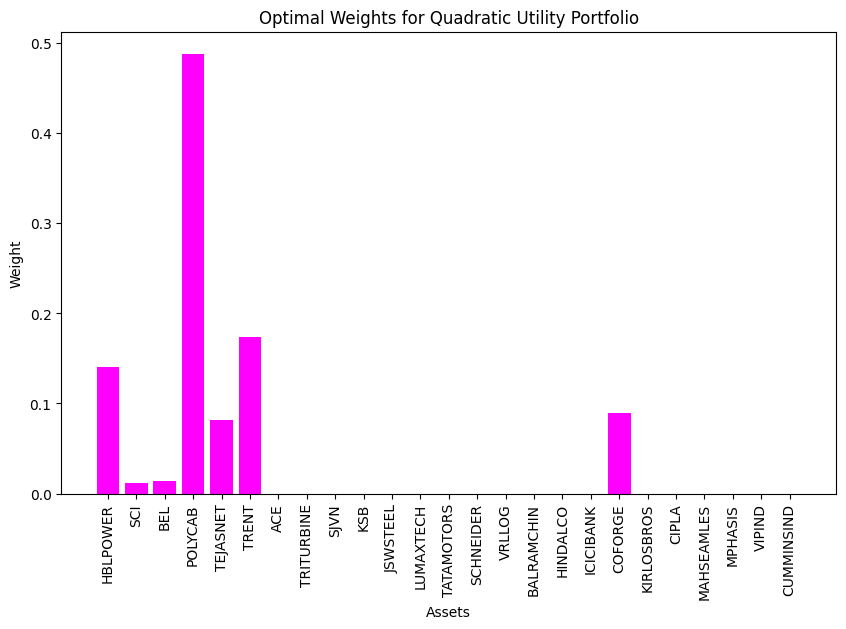

In [247]:
# Plotting the optimal weights for the Quadratic Utility Portfolio
plt.figure(figsize=(10, 6))
plt.bar(monthly_returns.columns, quadratic_utility_optimal_weights, color='magenta')
plt.title('Optimal Weights for Quadratic Utility Portfolio')
plt.xlabel('Assets')
plt.ylabel('Weight')
plt.xticks(rotation=90, ha='center')  # Set rotation to 90 degrees and ha to 'center' for better alignment
plt.show()


In [275]:
# Running the optimization to maximize the quadratic utility
quadratic_utility_result = minimize(negative_quadratic_utility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimal weights for the Quadratic Utility Portfolio
quadratic_utility_optimal_weights = quadratic_utility_result.x

# Creating a DataFrame for the Quadratic Utility Portfolio
quadratic_utility_portfolio_df = pd.DataFrame({
    'Stock': top_stocks,
    'Optimal Weight': quadratic_utility_optimal_weights,
    'Return': average_returns[top_stocks].values,
    'Risk': monthly_returns[top_stocks].std().values
})

# Display the first few rows of the DataFrame
quadratic_utility_portfolio_df

,Stock,Optimal Weight,Return,Risk
0,TEJASNET,1.404561e-01,0.055315,0.216932
1,HBLPOWER,1.137068e-02,0.052417,0.196310
2,SCI,1.450301e-02,0.046847,0.168783
3,ACE,4.880742e-01,0.044476,0.187506
4,TATAMOTORS,8.188709e-02,0.039155,0.194629
5,LUMAXTECH,1.739612e-01,0.034344,0.171321
6,TRENT,0.000000e+00,0.040958,0.119802
7,KIRLOSBROS,0.000000e+00,0.031148,0.179708
8,COFORGE,0.000000e+00,0.036467,0.137511
9,JSWSTEEL,0.000000e+00,0.035214,0.142372


from matplotlib import pyplot as plt
quadratic_utility_portfolio_df['Optimal Weight'].plot(kind='hist', bins=20, title='Optimal Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
quadratic_utility_portfolio_df['Return'].plot(kind='hist', bins=20, title='Return')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
quadratic_utility_portfolio_df['Risk'].plot(kind='hist', bins=20, title='Risk')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
quadratic_utility_portfolio_df.plot(kind='scatter', x='Optimal Weight', y='Return', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
quadratic_utility_portfolio_df.plot(kind='scatter', x='Return', y='Risk', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
quadratic_utility_portfolio_df['Optimal Weight'].plot(kind='line', figsize=(8, 4), title='Optimal Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
quadratic_utility_portfolio_df['Return'].plot(kind='line', figsize=(8, 4), title='Return')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
quadratic_utility_portfolio_df['Risk'].plot(kind='line', figsize=(8, 4), title='Risk')
plt.gca().spines[['top', 'right']].set_visible(False)

# Backtesting the portfolios for 36 Months Data (i.e. 3 1/2 years Data)

In [248]:
# Average returns and covariance matrix
average_returns = monthly_returns.mean()
covariance_matrix = monthly_returns.cov()

In [249]:
# Function to minimize portfolio variance
def portfolio_variance(weights):
    return np.dot(weights.T, np.dot(covariance_matrix, weights))

In [250]:
# Constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))

In [251]:
# Minimum Variance Portfolio
min_var_result = minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
min_var_weights = min_var_result.x

# Global Minimum Variance Portfolio (same as Minimum Variance Portfolio in this case)
# gmvp_weights = min_var_weights
gmvp_weights = gmvp_optimal_weights

In [252]:
# Tangency Portfolio (Max Sharpe Ratio)
def negative_sharpe_ratio(weights):
    portfolio_return = np.dot(weights, average_returns)
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_std_dev = np.sqrt(portfolio_variance)
    return -(portfolio_return - risk_free_rate) / portfolio_std_dev

tangency_result = minimize(negative_sharpe_ratio, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
tangency_weights = tangency_result.x

In [253]:
# Update portfolio_weights dictionary for backtesting
portfolio_weights = {
    "Minimum Variance": min_var_weights,
    "Global Minimum Variance": gmvp_weights,
    "Tangency": tangency_weights,
    "Global Minimum variance with target return": target_return_optimal_weights,
    "ETL (Expected Tail Loss) Portfolio": optimal_etl_weights,
    "Quadratic Utility Portfolio": quadratic_utility_optimal_weights,
}

In [254]:
def backtest_portfolio(weights, returns, window=None):
    if window is not None:
        returns = returns[-window:]  # Use the last 'window' rows of data

    # Rest of the function remains unchanged
    portfolio_returns = returns.dot(weights)
    cumulative_returns = (1 + portfolio_returns).cumprod()
    annualized_return = np.power(cumulative_returns.iloc[-1], 12 / len(returns)) - 1
    annualized_risk = portfolio_returns.std() * np.sqrt(12)
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_risk

    return cumulative_returns, annualized_return, annualized_risk, sharpe_ratio

In [255]:
# Backtest results
backtest_results = {}

for name, weights in portfolio_weights.items():
    #cum_returns, annualized_return, annualized_risk = backtest_portfolio(weights, monthly_returns)
    cumulative_returns, annualized_return, annualized_risk, sharpe_ratio = backtest_portfolio(weights, monthly_returns, window=36)


    # Calculate Sharpe Ratio
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_risk

    backtest_results[name] = {
        #"Cumulative Returns": cum_returns,
        "Annualized Return": annualized_return,
        "Annualized Risk": annualized_risk,
        "Sharpe Ratio": sharpe_ratio
    }

In [256]:
# Backtest results for various Portfolios
backtest_results_min_var = backtest_results["Minimum Variance"]
backtest_results_gmvp = backtest_results["Global Minimum Variance"]
backtest_results_tangency = backtest_results["Tangency"]
backtest_results_gmvp_t_return = backtest_results["Global Minimum variance with target return"]
backtest_results_etl = backtest_results["ETL (Expected Tail Loss) Portfolio"]
backtest_results_qup = backtest_results["Quadratic Utility Portfolio"]

# Displaying the backtest results for Global Minimum Variance Portfolio

print("Minimum Varince Portfolio Return:\n", backtest_results_min_var)

print("Global Minimum Variance:\n", backtest_results_gmvp)

print("Tangency:\n", backtest_results_tangency)

print("Global Minimum Variance with Target Return:\n", backtest_results_gmvp_t_return)

print("ETL (Expected Tail Loss) Portfolio:\n", backtest_results_etl)

print("Quadratic Utility Portfolio:\n", backtest_results_qup)

Minimum Varince Portfolio Return:
 {'Annualized Return': 0.30406055677834964, 'Annualized Risk': 0.15051341594628823, 'Sharpe Ratio': 1.62152028271981}
Global Minimum Variance:
 {'Annualized Return': 0.30406055677834964, 'Annualized Risk': 0.15051341594628823, 'Sharpe Ratio': 1.62152028271981}
Tangency:
 {'Annualized Return': 1.0957252789999523, 'Annualized Risk': 0.7245085075652559, 'Sharpe Ratio': 1.429555716992965}
Global Minimum Variance with Target Return:
 {'Annualized Return': 0.48104957752306965, 'Annualized Risk': 0.19230281917159342, 'Sharpe Ratio': 2.189513286060375}
ETL (Expected Tail Loss) Portfolio:
 {'Annualized Return': 0.5706006054947348, 'Annualized Risk': 0.3564048104734491, 'Sharpe Ratio': 1.432642294632476}
Quadratic Utility Portfolio:
 {'Annualized Return': 0.6326231129824191, 'Annualized Risk': 0.3032443797203251, 'Sharpe Ratio': 1.8883222617696507}


# Comparison of backtested results to select portfolio based on sharpe Ratio and Portfolio Selection Rationale Based on Sharpe Ratio

In [257]:
# Creating a list of backtest results dictionaries
backtest_results_list = [backtest_results_min_var, backtest_results_gmvp, backtest_results_tangency, backtest_results_gmvp_t_return, backtest_results_etl, backtest_results_qup]

# Creating a DataFrame dynamically
df_backtest_results = pd.DataFrame(backtest_results_list)
portfolios = ["Minimum Variance", "Global Minimum Variance", "Tangency", "Global Minimum Variance with Target Return", "ETL (Expected Tail Loss) Portfolio", "Quadratic Utility Portfolio"]
df_backtest_results["Portfolio"] = portfolios

# Reordering columns
df_backtest_results = df_backtest_results[["Portfolio", "Annualized Return", "Annualized Risk", "Sharpe Ratio"]]
comparison_df = pd.DataFrame(df_backtest_results)

comparison_df.sort_values(by="Sharpe Ratio", ascending=False)  # Sorting by Sharpe Ratio for better comparison


,Portfolio,Annualized Return,Annualized Risk,Sharpe Ratio
3,Global Minimum Variance with Target Return,0.481050,0.192303,2.189513
5,Quadratic Utility Portfolio,0.632623,0.303244,1.888322
0,Minimum Variance,0.304061,0.150513,1.621520
1,Global Minimum Variance,0.304061,0.150513,1.621520
4,ETL (Expected Tail Loss) Portfolio,0.570601,0.356405,1.432642
2,Tangency,1.095725,0.724509,1.429556


### Selected Portfolio "Global Minimum Variance with Target Return" and printing Stock lables and its weights

In [258]:
asset_labels = data.columns.tolist()
# Extracting asset labels with non-zero weights (considering weights close to zero)
non_zero_weights = [(label, weight * 100) for label, weight in zip(asset_labels, target_return_optimal_weights) if abs(weight) > 1e-5]

# Printing total number of stocks
print(f"Total Number of Stocks in the Portfolio: {len(non_zero_weights)}\n")

# Printing asset labels and corresponding weights as percentages for non-zero weights
for label, weight in non_zero_weights:
    print(f"{label}: {weight:.4f}%")

Total Number of Stocks in the Portfolio: 9

HBLPOWER: 5.4471%
BEL: 13.2058%
POLYCAB: 23.9699%
TRENT: 15.8570%
SJVN: 8.4897%
KSB: 0.5046%
COFORGE: 1.9773%
CIPLA: 27.2998%
MPHASIS: 3.2488%


In [259]:
asset_labels = data.columns.tolist()
# Extracting asset labels with non-zero weights (considering weights close to zero)
non_zero_weights = [(label, weight * 100) for label, weight in zip(asset_labels, target_return_optimal_weights) if abs(weight) > 1e-5]

# Printing total number of stocks
print(f"Total Number of Stocks in the Portfolio: {len(non_zero_weights)}\n")

# Printing asset labels and corresponding weights as percentages for non-zero weights
for label, weight in non_zero_weights:
    print(f"{label}: {weight:}%")

Total Number of Stocks in the Portfolio: 9

HBLPOWER: 5.447136762369419%
BEL: 13.205752725213754%
POLYCAB: 23.969880104532418%
TRENT: 15.857038543777847%
SJVN: 8.489679737704234%
KSB: 0.5046067641206256%
COFORGE: 1.9773405021153934%
CIPLA: 27.299776626023842%
MPHASIS: 3.2487882341424674%


In [260]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

,Stock,Weight,Return,Risk
0,TEJASNET,0.04,0.055315,0.216932
1,HBLPOWER,0.04,0.052417,0.196310
2,SCI,0.04,0.046847,0.168783
3,ACE,0.04,0.044476,0.187506
4,TATAMOTORS,0.04,0.039155,0.194629
5,LUMAXTECH,0.04,0.034344,0.171321
6,TRENT,0.04,0.040958,0.119802
7,KIRLOSBROS,0.04,0.031148,0.179708
8,COFORGE,0.04,0.036467,0.137511
9,JSWSTEEL,0.04,0.035214,0.142372


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

,Stock,Optimal Weight,Return,Risk
0,TEJASNET,5.232433e-18,0.055315,0.216932
1,HBLPOWER,2.025283e-18,0.052417,0.196310
2,SCI,0.000000e+00,0.046847,0.168783
3,ACE,0.000000e+00,0.044476,0.187506
4,TATAMOTORS,0.000000e+00,0.039155,0.194629
5,LUMAXTECH,1.091993e-01,0.034344,0.171321
6,TRENT,1.568630e-19,0.040958,0.119802
7,KIRLOSBROS,0.000000e+00,0.031148,0.179708
8,COFORGE,5.930399e-01,0.036467,0.137511
9,JSWSTEEL,2.690962e-18,0.035214,0.142372
